In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob
import librosa
# Printa todos os valores do array
#np.set_printoptions(threshold=np.inf)
np.set_printoptions(threshold=10)
import pandas as pd
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [27]:
data = glob.glob('datasets/fernando_falas/*.wav')

In [30]:
len_audios = []
audios = []

for file in sorted(data):
    audio, sr = librosa.core.load(file, sr=None, mono=True, offset=0.0, duration=None)
    len_audios.append(len(audio))
    audios.append(audio)
    max_audio = max(len_audios)
    
#print (max(len_audios))
#print (audios[0])
#print (len(audios))
#print (sr)

In [31]:
hop_length = 380
n_fft = 1600

#To convert the hop length and frame size to units of seconds:
print (float(hop_length)/sr) # units of seconds
print (float(n_fft)/sr) # units of seconds

audios_resize = []
specs = []

for i in range(len(audios)):
    shape = (max(len_audios))
    i_audio = np.array(audios[i])
    i_audio.resize(shape)
    x = librosa.stft(i_audio, n_fft=n_fft, hop_length=hop_length).T 
    X = librosa.amplitude_to_db(np.abs(x))
    specs.append(X)
    audios_resize.append(i_audio)

#Librosa.stft return:
#np.ndarray [shape=(1 + n_fft/2, t), dtype=dtype]

0.02375
0.1


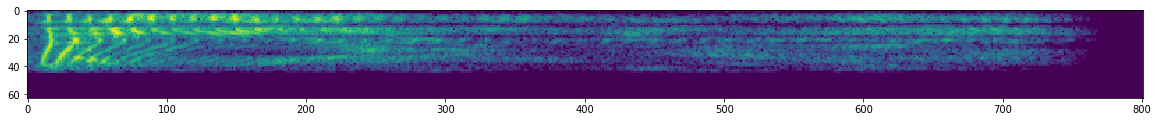

In [32]:
plt.figure(figsize=(20,15))
plt.imshow(specs[0])

In [33]:
print (specs[2].shape)
print (len(specs))

(63, 801)
1200


In [15]:
l = pd.read_csv('datasets/fernando_falas/labels2.csv', sep=',')
l
#file = open('datasets/fernando_falas/labels.txt', 'r')
#print (file.read())

,Audio,label
0,academia1.wav,ACADEMIA
1,academia2.wav,ACADEMIA
2,academia3.wav,ACADEMIA
3,academia4.wav,ACADEMIA
4,academia5.wav,ACADEMIA
5,academia6.wav,ACADEMIA
6,academia7.wav,ACADEMIA
7,academia8.wav,ACADEMIA
8,academia9.wav,ACADEMIA
9,academia10.wav,ACADEMIA


In [18]:
l_col = l['label']
l_col

0       ACADEMIA
1       ACADEMIA
2       ACADEMIA
3       ACADEMIA
4       ACADEMIA
5       ACADEMIA
6       ACADEMIA
7       ACADEMIA
8       ACADEMIA
9       ACADEMIA
10      ACADEMIA
11      ACADEMIA
12      ACADEMIA
13      ACADEMIA
14      ACADEMIA
15      ACADEMIA
16      ACADEMIA
17      ACADEMIA
18      ACADEMIA
19      ACADEMIA
20      ACADEMIA
21      ACADEMIA
22      ACADEMIA
23      ACADEMIA
24      ACADEMIA
25      ACADEMIA
26      ACADEMIA
27      ACADEMIA
28      ACADEMIA
29      ACADEMIA
          ...   
1170    TRABALHO
1171    TRABALHO
1172    TRABALHO
1173    TRABALHO
1174    TRABALHO
1175    TRABALHO
1176    TRABALHO
1177    TRABALHO
1178    TRABALHO
1179    TRABALHO
1180    TRABALHO
1181    TRABALHO
1182    TRABALHO
1183    TRABALHO
1184    TRABALHO
1185    TRABALHO
1186    TRABALHO
1187    TRABALHO
1188    TRABALHO
1189    TRABALHO
1190    TRABALHO
1191    TRABALHO
1192    TRABALHO
1193    TRABALHO
1194    TRABALHO
1195    TRABALHO
1196    TRABALHO
1197    TRABAL

In [19]:
# Need not be sorted, necessarily
a = (0, 1, 1, 1, 2, 3, 7, 7, 23)

def count_elements(seq) -> dict:
    """Tally elements from `seq`."""
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted = count_elements(a)
counted


{0: 1, 1: 3, 2: 1, 3: 1, 7: 2, 23: 1}

In [22]:
l_count = count_elements(l_col)
l_count

{'ACADEMIA': 120,
 'AEROPORTO': 120,
 'CASA': 120,
 'CINEMA': 120,
 'ESCOLA': 120,
 'FACULDADE': 120,
 'FARMACIA': 120,
 'HOSPITAL': 120,
 'MERCADO': 120,
 'TRABALHO': 120}

In [42]:
# To separate 80% to train and 20% to test
x_train, x_test, y_train, y_test = train_test_split(specs, l_col, test_size=0.2)

# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


NameError: name 'keras' is not defined